[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DavideDaz/TokyoDataScience/blob/master/Assignments/Gradient%20Descent%20Assignment/Basis%20Neural%20Network%20-%20Quadratic%20-%20Adam.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
observations = 100 # m

x_i =np.random.uniform(low=0, high=10, size=(observations,1))
x_i = np.sort(x_i, axis=0)

In [3]:
noise = np.random.uniform(-100,100,(observations,1))
alfa_true = 2
beta_true = 3
gamma_true = 8
targets = alfa_true + x_i*beta_true + gamma_true*x_i*x_i + noise 

## Gradient Descent Solution:


In [4]:
loss_Adam = []

learning_rate = 0.001

r = np.zeros(3)

s = np.zeros(3)

eps = 10**(-8)

Theta = np.array([0.17923125,0.10416243,0.12899188])

rho1 = 0.9
rho2 =0.999

t = 0

In [5]:
loss_RMSProp = []

r_rms = np.zeros(3)

eps = 10**(-8)

rho = 0.9

Theta_rms = np.array([0.17923125,0.10416243,0.12899188])

In [6]:
for i in range(15000):
    
    #Adam
    
    outputs_Adam = (x_i*x_i*Theta[2]) + (x_i*Theta[1]) + Theta[0]
    deltas_Adam = outputs_Adam - targets
    
    loss = sum(deltas_Adam**2)/2/observations
    loss_Adam.append(loss[0])
    
    deltas_scaled_Adam = deltas_Adam/ observations
    
    g = np.array([np.sum(deltas_scaled_Adam),np.dot(x_i.T,deltas_scaled_Adam)[0][0],np.dot((x_i*x_i).T,deltas_scaled_Adam)[0][0]])
    
    t += 1
    
    s = np.add(np.multiply(rho1,s),np.multiply((1-rho1),g))
    
    r =np.add(np.multiply(rho2,r),np.multiply(np.multiply(g,g),(1-rho2)))
    
    s_cap = np.divide(s,(1-rho1**t))          
    
    r_cap = np.divide(r,(1-rho2**t))
    
    DeltaTheta = -np.multiply(learning_rate,np.divide(s_cap,np.add(eps, np.sqrt(r_cap))))
    
    
    Theta += DeltaTheta
    
    #RMSProp
    
    outputs_rms = (x_i*x_i*Theta_rms[2]) + (x_i*Theta_rms[1]) + Theta_rms[0]
    deltas_rms = outputs_rms - targets
    
    loss_rms = sum(deltas_rms**2)/2/observations
    loss_RMSProp.append(loss_rms[0])
    
    deltas_scaled_rms = deltas_rms/ observations
    
    g_rms = np.array([np.sum(deltas_scaled_rms),np.dot(x_i.T,deltas_scaled_rms)[0][0],np.dot((x_i*x_i).T,deltas_scaled_rms)[0][0]])
    
    r_rms =np.add(np.multiply(r_rms,rho),np.multiply((1-rho),np.multiply(g_rms,g_rms)))
    
    
    DeltaTheta_rms = -np.multiply(np.divide(learning_rate,(eps + np.sqrt(r_rms))),g_rms)
    
    
    Theta_rms += DeltaTheta_rms
    

In [7]:
print(Theta)
print(Theta_rms)

[4.22683826 6.28246317 7.5242533 ]
[0.69291734 2.66601446 8.02451744]


In [8]:
y_rms = Theta_rms[0] + Theta_rms[1]*x_i + Theta_rms[2]*x_i*x_i
y_Ada = Theta[0] + Theta[1]*x_i + Theta[2]*x_i*x_i

Text(0, 0.5, 'y')

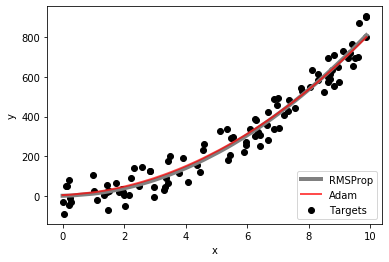

In [9]:
plt.scatter(x_i, targets, marker='o', color='black' )
plt.plot(x_i,y_rms, color='gray',linewidth=4)
plt.plot(x_i,y_Ada, color='red',linewidth=2, alpha=0.7)
plt.legend(('RMSProp','Adam','Targets'),loc='lower right')
plt.xlabel('x')
plt.ylabel('y')

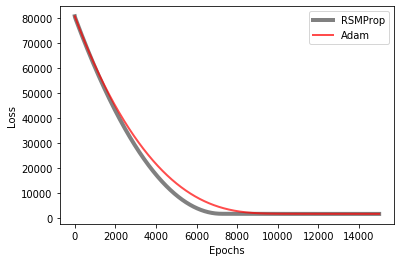

In [10]:
plt.plot(range(0,len(loss_RMSProp)),loss_RMSProp, color='gray',linewidth=4)
plt.plot(range(0,len(loss_Adam)),loss_Adam, color='red',linewidth=2, alpha=0.7)
plt.legend(('RSMProp','Adam'),loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')